# Optimizers

Comparing convergence speed and learning process for training with vanilla SGDm SGD with momentum and RMSProp.

In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import miowad.nn as nn
from miowad.data import RegressionDataset
from miowad.data import MinMaxScaler, StandardScaler
from miowad.nn.viz import visualize_nn
from miowad.utils import set_seed

set_seed(123)

In [ ]:
from miowad.metrics import mean_squared_error

def plot_preds_regression(model, X_train, y_train, X_test, y_test, X_scaler, y_scaler):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    # unnormalize predictions
    if y_scaler is not None:
        preds_train = y_scaler.inverse_transform(preds_train)
        preds_test = y_scaler.inverse_transform(preds_test)

    # unnormalize data
    if X_scaler is not None and y_scaler is not None:
        X_train = X_scaler.inverse_transform(X_train)
        X_test = X_scaler.inverse_transform(X_test)
        y_train = y_scaler.inverse_transform(y_train)
        y_test = y_scaler.inverse_transform(y_test)


    mse_train = mean_squared_error(y_train, preds_train)
    mse_test = mean_squared_error(y_test, preds_test)

    ax1.scatter(X_train, y_train, label='ground truth')
    ax1.scatter(X_train, preds_train, label='preds')
    ax1.set_title(f"Train MSE: {mse_train:.2f}")
    ax1.legend()

    ax2.scatter(X_test, y_test, label='ground truth')
    ax2.scatter(X_test, preds_test, label='preds')
    ax2.set_title(f"Test MSE: {mse_test:.2f}")
    ax2.legend()

## square-large

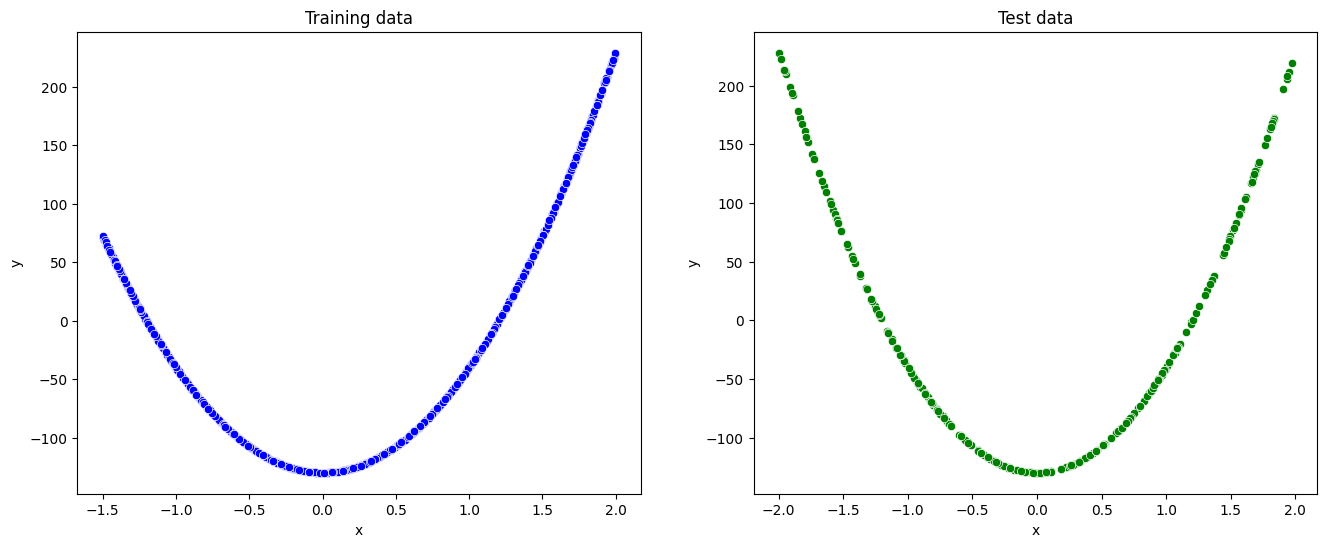

In [3]:
square_large = RegressionDataset('square-large')
square_large.plot_dataset()

In [8]:
square_large_train, square_large_test = square_large.to_df()

X_train, y_train = square_large_train['x'].values.reshape(-1, 1), square_large_train['y'].values.reshape(-1, 1)
X_test, y_test = square_large_test['x'].values.reshape(-1, 1), square_large_test['y'].values.reshape(-1, 1)

# let's scale the data for easier training
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')

In [ ]:
optimizer = nn.optimizers.Momentum(model.parameters, lr=1e-4, momentum=0.98)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=50000, batch_size=10, log_every=100)

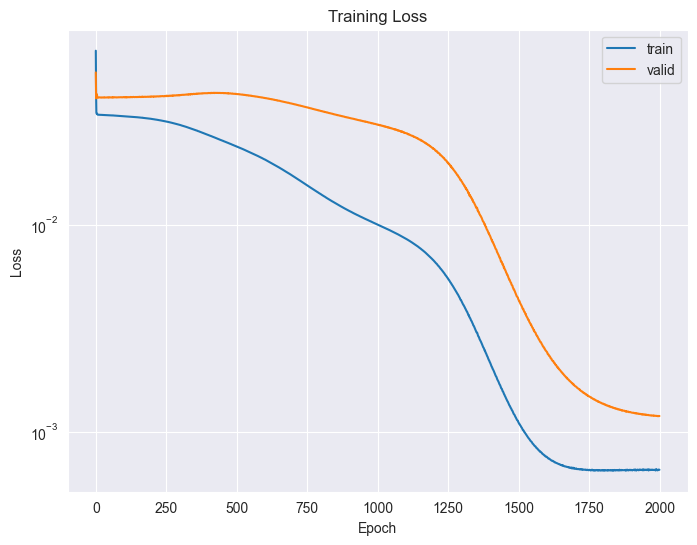

In [28]:
trainer.plot_training(ylog=True)

In [ ]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')
optimizer = nn.optimizers.RMSProp(model.parameters, lr=0.1, alpha=0.8)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=32, log_every=100)

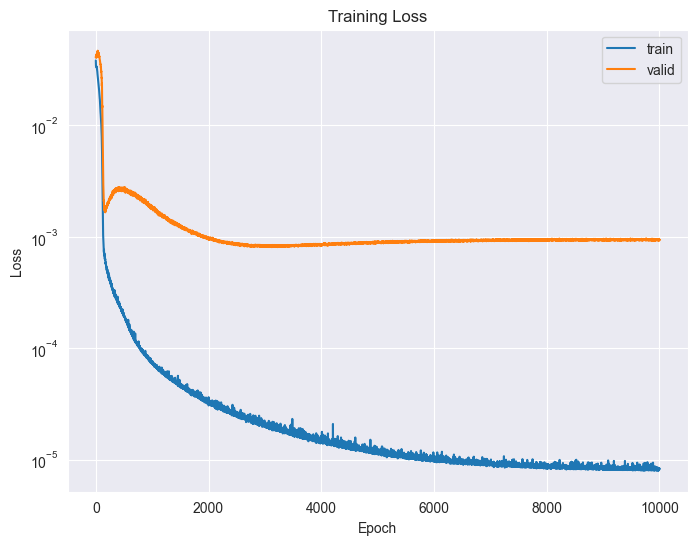

In [52]:
trainer.plot_training(ylog=True)

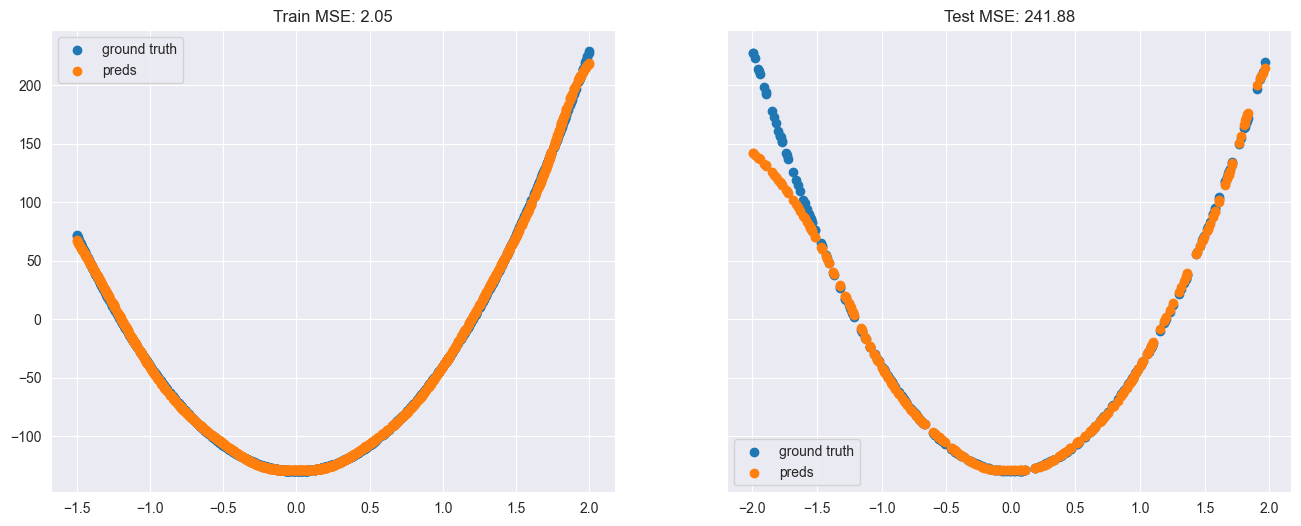

In [53]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

## steps-large

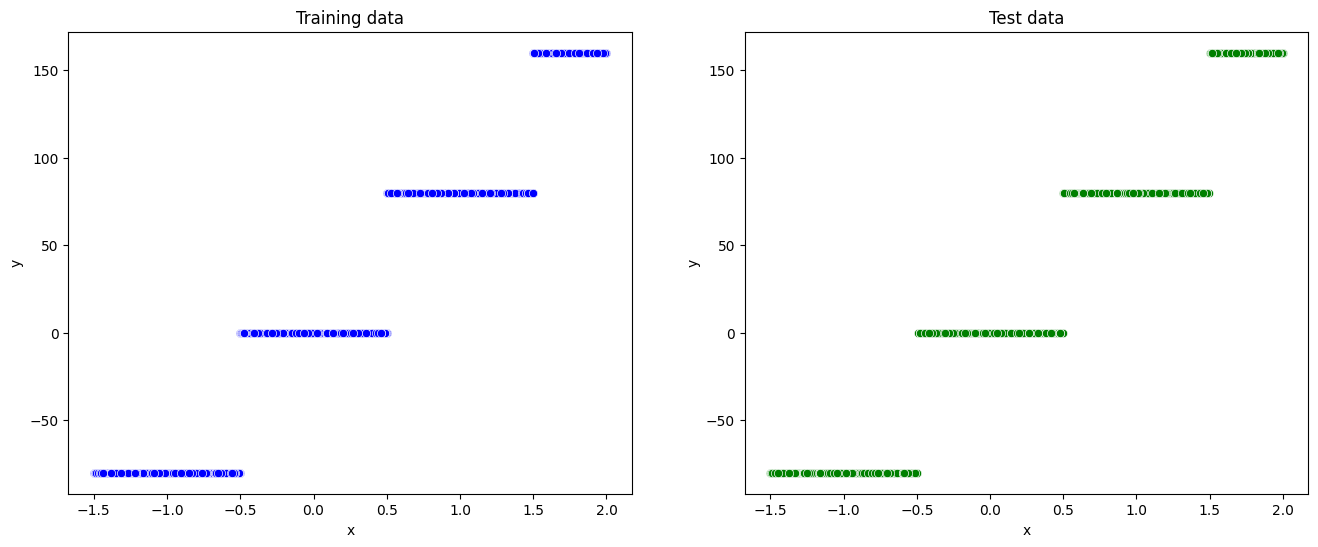

In [4]:
steps_large = RegressionDataset('steps-large')
steps_large.plot_dataset()

In [ ]:
steps_large_train, steps_large_test = steps_large.to_df()

X_train, y_train = steps_large_train['x'].values.reshape(-1, 1), steps_large_train['y'].values.reshape(-1, 1)
X_test, y_test = steps_large_test['x'].values.reshape(-1, 1), steps_large_test['y'].values.reshape(-1, 1)

# let's scale the data for easier training
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')
optimizer = nn.optimizers.Momentum(model.parameters, lr=0.1, alpha=0.9)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=16000, batch_size=64, log_every=100)

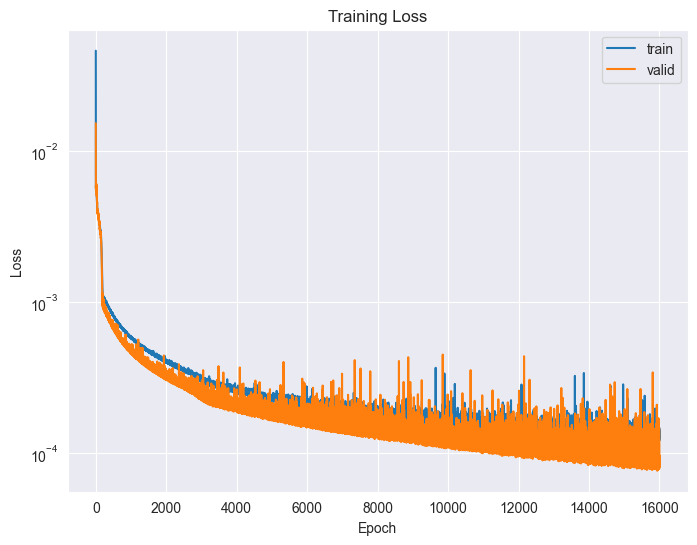

In [22]:
trainer.plot_training(ylog=True)

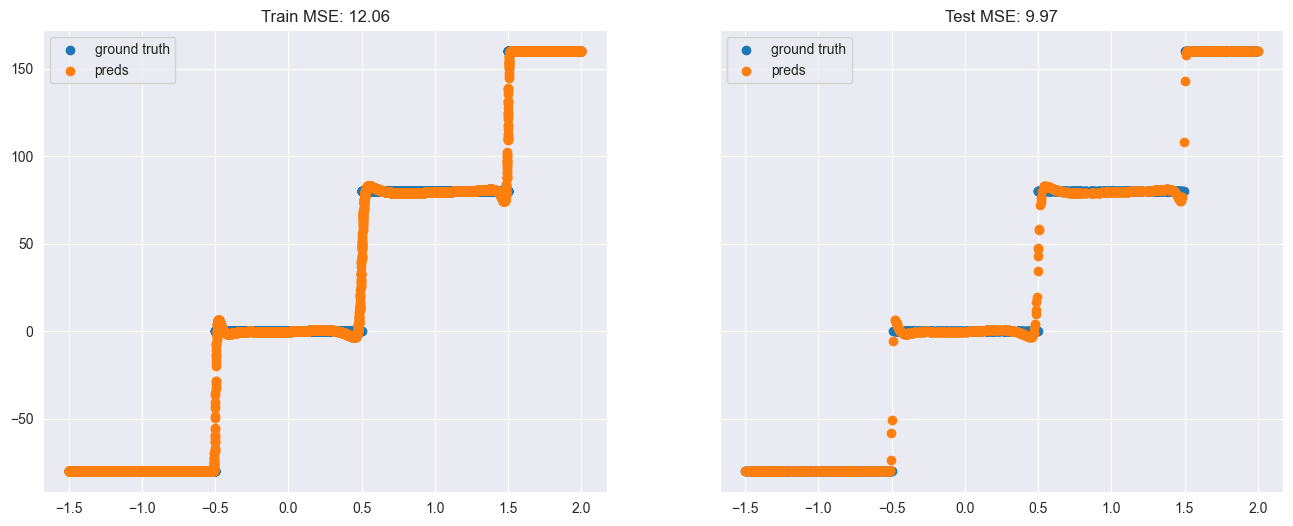

In [23]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

## multimodal-large

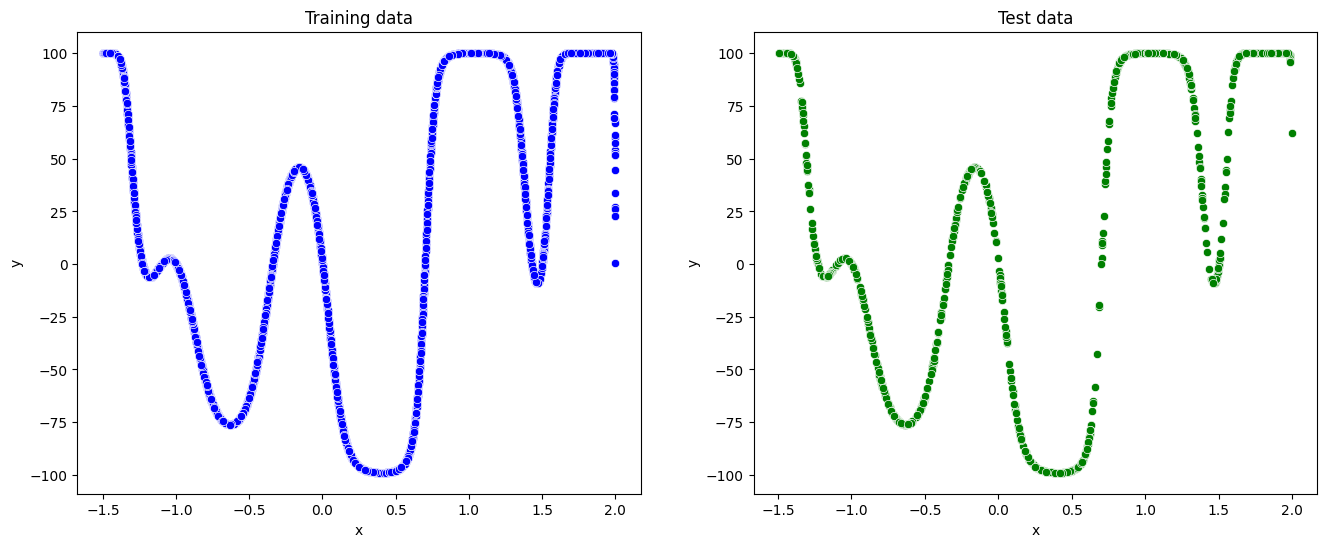

In [5]:
multimodal_large = RegressionDataset('multimodal-large')
multimodal_large.plot_dataset()

In [ ]:
multimodal_large_train, multimodal_large_test = multimodal_large.to_df()

X_train, y_train = multimodal_large_train['x'].values.reshape(-1, 1), multimodal_large_train['y'].values.reshape(-1, 1)
X_test, y_test = multimodal_large_test['x'].values.reshape(-1, 1), multimodal_large_test['y'].values.reshape(-1, 1)

# let's scale the data for easier training
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
model = nn.Sequential([
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
])
model.init_weights('xavier_uniform')
optimizer = nn.optimizers.Momentum(model.parameters, lr=1e-2, alpha=0.9)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)
trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)

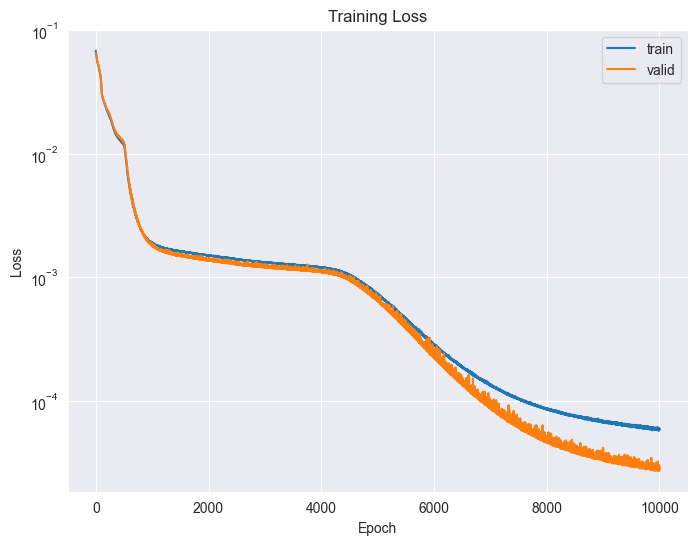

In [123]:
trainer.plot_training(ylog=True)

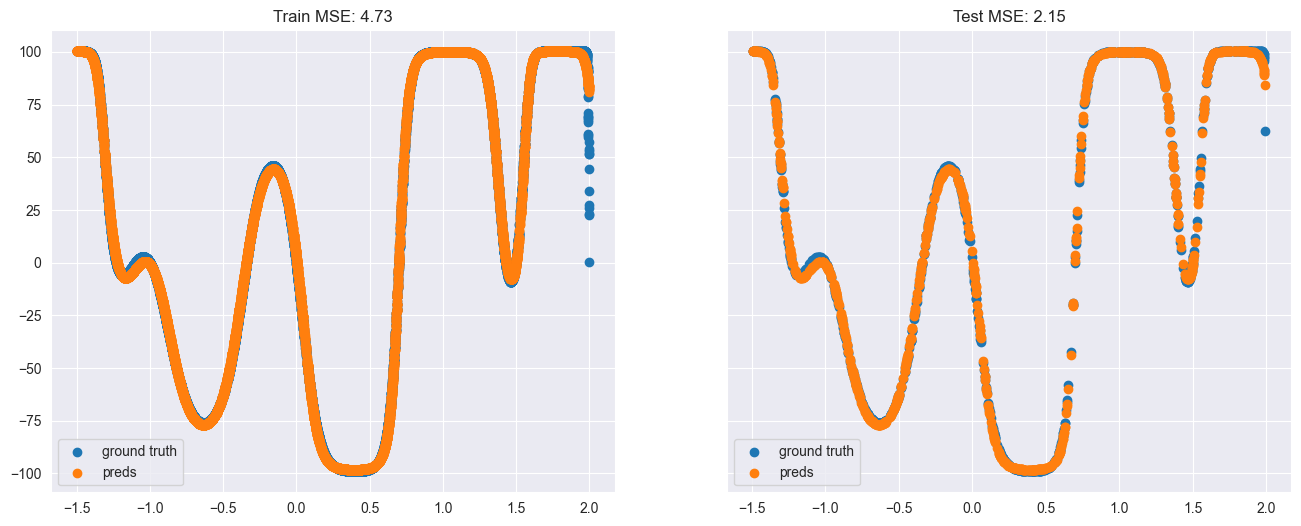

In [124]:
plot_preds_regression(model, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler)

## Various optimizers

In [ ]:
optimizers = {'sgd': nn.optimizers.SGD, 'momentum': nn.optimizers.Momentum, 'rmsprop': nn.optimizers.RMSProp}
histories = dict()
for o in optimizers.keys():
    print(f'Training with {o} optimizer')
    model = nn.Sequential([
        nn.Linear(1, 10),
        nn.Sigmoid(),
        nn.Linear(10, 10),
        nn.Sigmoid(),
        nn.Linear(10, 1),
    ])
    model.init_weights('xavier_uniform')
    optimizer = nn.optimizers.Momentum(model.parameters, lr=1e-2, alpha=0.9)
    criterion = nn.MSELoss()
    trainer = nn.Trainer(model, optimizer, criterion)
    trainer.train(X_train_scaled, y_train_scaled, X_valid=X_test_scaled, y_valid=y_test_scaled, num_epochs=10000, batch_size=64, log_every=100)
    histories[o] = trainer.history

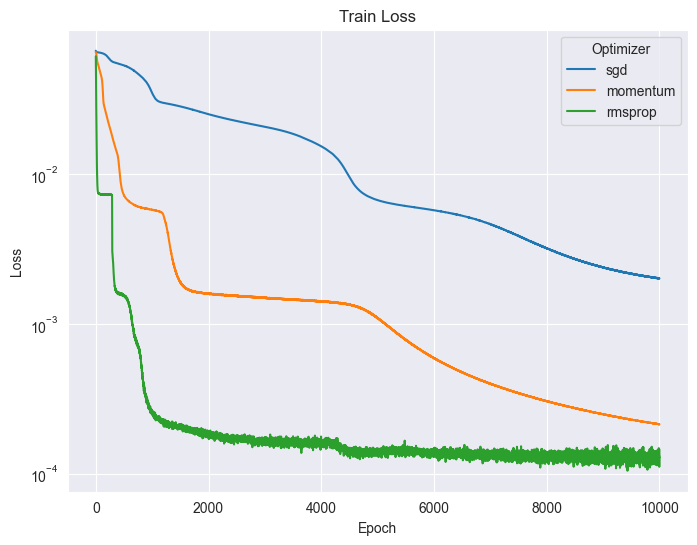

In [23]:
plt.figure(figsize=(8, 6))
plt.title("Train Loss")
for o in optimizers:
    plt.plot(histories[o]['train_loss'], label=o)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend(title='Optimizer', loc='best')
plt.show()